In [1]:
from datetime import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import aqi

aqi 是单独计算空气质量指数(AQI) 的模块

以下所用数据来自 http://beijingair.sinaapp.com/ 提供的全国站点空气质量数据

In [2]:
data = pd.read_csv('china_sites_20170101.csv')

首先还是来看一下数据组成，前三列分别是日期，时间和要素类型，后面的则是对应站点编码

In [3]:
data.head(20)

,date,hour,type,1001A,1002A,1003A,1004A,1005A,1006A,1007A,...,2706A,2707A,2708A,2709A,2710A,2711A,2835A,2842A,2845A,2846A
0,20170101,0,AQI,445.0,280.0,500.0,449.0,483.0,492.0,481.0,...,32.0,42.0,73.0,182.0,199.0,202.0,55.0,43.0,133.0,145.0
1,20170101,0,PM2.5,417.0,230.0,501.0,423.0,474.0,487.0,471.0,...,22.0,4.0,53.0,137.0,149.0,152.0,31.0,25.0,101.0,111.0
2,20170101,0,PM2.5_24h,397.0,207.0,365.0,352.0,341.0,343.0,301.0,...,16.0,7.0,36.0,146.0,157.0,275.0,53.0,31.0,133.0,63.0
3,20170101,0,PM10,460.0,NaN,601.0,509.0,524.0,543.0,499.0,...,22.0,15.0,NaN,181.0,195.0,255.0,59.0,43.0,161.0,145.0
4,20170101,0,PM10_24h,433.0,205.0,453.0,433.0,438.0,391.0,341.0,...,26.0,34.0,36.0,197.0,180.0,377.0,89.0,65.0,191.0,79.0
5,20170101,0,SO2,7.0,16.0,9.0,5.0,12.0,9.0,6.0,...,2.0,2.0,21.0,30.0,27.0,7.0,28.0,12.0,168.0,18.0
6,20170101,0,SO2_24h,17.0,27.0,24.0,8.0,22.0,26.0,29.0,...,3.0,45.0,44.0,23.0,18.0,16.0,36.0,17.0,156.0,19.0
7,20170101,0,NO2,112.0,120.0,90.0,102.0,106.0,108.0,130.0,...,19.0,1.0,61.0,36.0,47.0,35.0,38.0,61.0,42.0,178.0
8,20170101,0,NO2_24h,148.0,117.0,129.0,135.0,127.0,139.0,162.0,...,12.0,25.0,43.0,49.0,63.0,74.0,54.0,55.0,61.0,105.0
9,20170101,0,O3,6.0,2.0,2.0,2.0,11.0,2.0,6.0,...,97.0,79.0,22.0,51.0,52.0,25.0,27.0,26.0,76.0,6.0


下面主要看一下怎么利用已有要素数据计算AQI，首先获取其中一个站点的数据，以1001A站点为例

In [4]:
A1001 = data[['date', 'hour', 'type', '1001A']]

In [5]:
A1001.head()

,date,hour,type,1001A
0,20170101,0,AQI,445.0
1,20170101,0,PM2.5,417.0
2,20170101,0,PM2.5_24h,397.0
3,20170101,0,PM10,460.0
4,20170101,0,PM10_24h,433.0


因为这些要素是时间序列数据，所以把索引替换为时间格式索引，方便后续处理

In [6]:
A1001.index = pd.to_datetime(A1001.date.astype(np.str) + A1001.hour.apply(lambda x: '%02d'%x), format='%Y%m%d%H')

In [7]:
A1001 = A1001[['type', '1001A']]  # 转换时间索引后，仅需要 type 和 1001A两列，date 和 hour 两列删除

In [8]:
A1001.head()  

,type,1001A
2017-01-01,AQI,445.0
2017-01-01,PM2.5,417.0
2017-01-01,PM2.5_24h,397.0
2017-01-01,PM10,460.0
2017-01-01,PM10_24h,433.0


上述 A1001 数据排列方式和常规不太一样，为了方便后面计算，我们需要将 AQI，PM2.5这些要素名称作为列名，因此对上述 dataframe 进行转换

In [9]:
A1001_2 = A1001.pivot_table(columns='type', index=A1001.index)

转换后的数据则以 站点名称 和 要素名称为列索引，由于这是一个 MultiIndex，而只有一个站点，所以可能不需要设置为 MultiIndex，下面对列索引进行降级

In [10]:
A1001_2

1001A                                                \
type                   AQI   CO CO_24h    NO2 NO2_24h    O3 O3_24h O3_8h   
2017-01-01 00:00:00  445.0  5.2    5.0  112.0   148.0   6.0    9.0   5.0   
2017-01-01 01:00:00  438.0  5.3    5.0  115.0   149.0   5.0    9.0   5.0   
2017-01-01 02:00:00  426.0  5.2    5.1  118.0   149.0   5.0    9.0   5.0   
2017-01-01 03:00:00  420.0  5.1    5.2  118.0   149.0   5.0    9.0   5.0   
2017-01-01 04:00:00  415.0  5.3    5.2  115.0   148.0   NaN    9.0   4.0   
2017-01-01 05:00:00  420.0  5.3    5.2  115.0   148.0   7.0    8.0   4.0   
2017-01-01 06:00:00  426.0  5.6    5.2  119.0   147.0   7.0    8.0   5.0   
2017-01-01 07:00:00  434.0  5.7    5.3  119.0   147.0   7.0    8.0   5.0   
2017-01-01 08:00:00  431.0  5.9    5.3  115.0   147.0   8.0    8.0   6.0   
2017-01-01 09:00:00  436.0  5.9    5.3  120.0   147.0   8.0    8.0   6.0   
2017-01-01 10:00:00  454.0  6.3    5.3  134.0   146.0   8.0    8.0   6.0   
2017-01-01 11:00:00  496.0  6.5    5.3  150.0   145.0   8.0    8.0   7.0   
2017-01-01 12:00:00  500.0  6.4    5.3  165.0   144.0   8.0    8.0   8.0   
2017-01-01 15:00:00  500.0  6.1    5.3  188.0   140.0  10.0   10.0   9.0   
2017-01-01 16:00:00  500.0  6.2    5.4  193.0   139.0   8.0   10.0   9.0   
2017-01-01 18:00:00  488.0  6.3    5.6  176.0   141.0   6.0   10.0   8.0   
2017-01-01 19:00:00  480.0  6.1    5.7  161.0   141.0   6.0   10.0   8.0   
2017-01-01 21:00:00  462.0  6.0    5.8  144.0   141.0   7.0   10.0   8.0   
2017-01-01 22:00:00  444.0  6.0    5.9  140.0   142.0   7.0   10.0   7.0   

                                                                             
type                O3_8h_24h   PM10 PM10_24h  PM2.5 PM2.5_24h  SO2 SO2_24h  
2017-01-01 00:00:00       7.0  460.0    433.0  417.0     397.0  7.0    17.0  
2017-01-01 01:00:00       5.0  435.0    436.0  406.0     400.0  7.0    16.0  
2017-01-01 02:00:00       5.0    NaN    439.0  388.0     401.0  3.0    16.0  
2017-01-01 03:00:00       5.0  389.0    440.0  380.0     401.0  3.0    16.0  
2017-01-01 04:00:00       5.0  396.0    443.0  372.0     404.0  4.0    15.0  
2017-01-01 05:00:00       5.0  422.0    448.0  380.0     406.0  4.0    15.0  
2017-01-01 06:00:00       5.0  436.0    452.0  389.0     408.0  4.0    14.0  
2017-01-01 07:00:00       5.0  433.0    451.0  401.0     412.0  5.0    14.0  
2017-01-01 08:00:00       6.0  432.0    453.0  396.0     414.0  5.0    14.0  
2017-01-01 09:00:00       6.0  479.0    457.0  403.0     416.0  5.0    13.0  
2017-01-01 10:00:00       6.0  473.0    459.0  430.0     417.0  6.0    13.0  
2017-01-01 11:00:00       7.0  540.0    464.0  493.0     421.0  6.0    12.0  
2017-01-01 12:00:00       8.0  559.0    468.0  532.0     427.0  6.0    11.0  
2017-01-01 15:00:00       9.0  553.0    482.0  533.0     440.0  7.0     8.0  
2017-01-01 16:00:00       9.0  540.0    485.0  521.0     443.0  6.0     7.0  
2017-01-01 18:00:00       9.0  509.0    488.0  481.0     452.0  5.0     6.0  
2017-01-01 19:00:00       9.0  504.0    488.0  469.0     452.0  5.0     6.0  
2017-01-01 21:00:00       9.0  495.0    490.0  442.0     451.0  5.0     6.0  
2017-01-01 22:00:00       9.0  474.0    487.0  416.0     448.0  5.0     5.0

In [11]:
idx = pd.IndexSlice  # 方便对 MultiIndex 进行索引

In [12]:
test = A1001_2.loc[:, idx['1001A', ['PM2.5', 'PM10', 'CO', 'SO2', 'O3', 'NO2']]]

In [13]:
test.head()

1001A                               
type                   CO    NO2   O3   PM10  PM2.5  SO2
2017-01-01 00:00:00   5.2  112.0  6.0  460.0  417.0  7.0
2017-01-01 01:00:00   5.3  115.0  5.0  435.0  406.0  7.0
2017-01-01 02:00:00   5.2  118.0  5.0    NaN  388.0  3.0
2017-01-01 03:00:00   5.1  118.0  5.0  389.0  380.0  3.0
2017-01-01 04:00:00   5.3  115.0  NaN  396.0  372.0  4.0

In [14]:
test.xs('1001A', axis=1)  # 列降维

type,CO,NO2,O3,PM10,PM2.5,SO2
2017-01-01 00:00:00,5.2,112.0,6.0,460.0,417.0,7.0
2017-01-01 01:00:00,5.3,115.0,5.0,435.0,406.0,7.0
2017-01-01 02:00:00,5.2,118.0,5.0,NaN,388.0,3.0
2017-01-01 03:00:00,5.1,118.0,5.0,389.0,380.0,3.0
2017-01-01 04:00:00,5.3,115.0,NaN,396.0,372.0,4.0
2017-01-01 05:00:00,5.3,115.0,7.0,422.0,380.0,4.0
2017-01-01 06:00:00,5.6,119.0,7.0,436.0,389.0,4.0
2017-01-01 07:00:00,5.7,119.0,7.0,433.0,401.0,5.0
2017-01-01 08:00:00,5.9,115.0,8.0,432.0,396.0,5.0
2017-01-01 09:00:00,5.9,120.0,8.0,479.0,403.0,5.0


In [15]:
test.columns = ['CO', 'NO2', 'O3', 'PM10', 'PM2_5', 'SO2']

最终将数据整理成符合 aqi 模块所需要的格式，然后计算 对应时刻的 AQI 值

由于原始数据存在缺失值，因此程序中给了是否进行插值的选项，如果选择插值，默认使用 pandas.DataFrame.interpolate 默认方法插值，当然也可以在进行计算之前处理缺失值

也可以忽略缺失值之后计算

In [16]:
test.head()

,CO,NO2,O3,PM10,PM2_5,SO2
2017-01-01 00:00:00,5.2,112.0,6.0,460.0,417.0,7.0
2017-01-01 01:00:00,5.3,115.0,5.0,435.0,406.0,7.0
2017-01-01 02:00:00,5.2,118.0,5.0,NaN,388.0,3.0
2017-01-01 03:00:00,5.1,118.0,5.0,389.0,380.0,3.0
2017-01-01 04:00:00,5.3,115.0,NaN,396.0,372.0,4.0


In [17]:
caqi = aqi.aqi(test, freq='1h', interp=True, style=False, clean=True)

In [18]:
caqi.calculate_aqi()

,so2,no2,o3,co,pm2_5,pm10,aqi,首要污染物,level
2017-01-01 00:00:00,7.0,112.0,6.0,5.2,417.0,460.0,444.666667,pm2_5,严重污染
2017-01-01 01:00:00,7.0,115.0,5.0,5.3,406.0,435.0,437.333333,pm2_5,严重污染
2017-01-01 02:00:00,3.0,118.0,5.0,5.2,388.0,412.0,425.333333,pm2_5,严重污染
2017-01-01 03:00:00,3.0,118.0,5.0,5.1,380.0,389.0,420.000000,pm2_5,严重污染
2017-01-01 04:00:00,4.0,115.0,6.0,5.3,372.0,396.0,414.666667,pm2_5,严重污染
2017-01-01 05:00:00,4.0,115.0,7.0,5.3,380.0,422.0,420.000000,pm2_5,严重污染
2017-01-01 06:00:00,4.0,119.0,7.0,5.6,389.0,436.0,426.000000,pm2_5,严重污染
2017-01-01 07:00:00,5.0,119.0,7.0,5.7,401.0,433.0,434.000000,pm2_5,严重污染
2017-01-01 08:00:00,5.0,115.0,8.0,5.9,396.0,432.0,430.666667,pm2_5,严重污染
2017-01-01 09:00:00,5.0,120.0,8.0,5.9,403.0,479.0,435.333333,pm2_5,严重污染


In [25]:
caqi = aqi.aqi(test, freq='1h', interp=True, style=True, clean=True)

In [26]:
cd = caqi.calculate_aqi()

In [27]:
A1001_2.loc[:, idx['1001A', ['AQI']]]   ## 数据中给出的 AQI 值

,1001A
type,AQI
2017-01-01 00:00:00,445.0
2017-01-01 01:00:00,438.0
2017-01-01 02:00:00,426.0
2017-01-01 03:00:00,420.0
2017-01-01 04:00:00,415.0
2017-01-01 05:00:00,420.0
2017-01-01 06:00:00,426.0
2017-01-01 07:00:00,434.0
2017-01-01 08:00:00,431.0


通过对比原始数据中给出的 AQI 值和上述程序计算出的 AQI 值可以发现，两者基本相同
蓝色为原始数据
红色为aqi程序计算结果

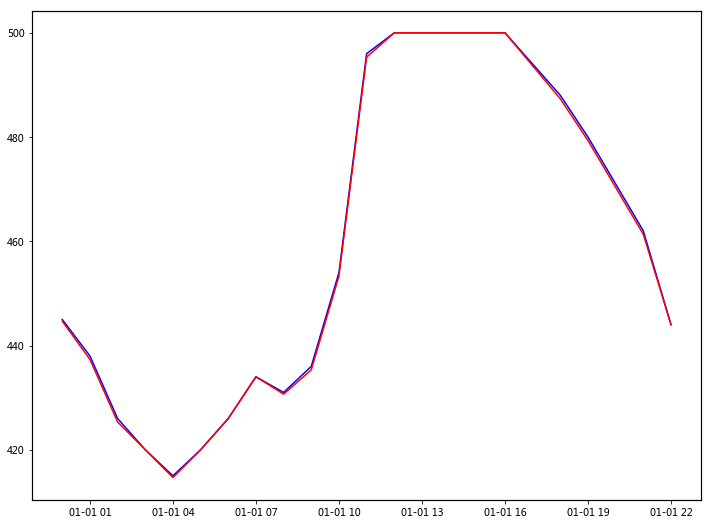

In [28]:
fig, ax = plt.subplots(figsize=(12, 9))

ax.plot(A1001_2.index, A1001_2.loc[:, idx['1001A', ['AQI']]].values, 'b')

ax.plot(cd.index, cd.aqi, 'r')

如果不想插值之后计算，也可以直接使用 dropna 参数忽略所有的缺失值

In [29]:
caqi = aqi.aqi(test, freq='1h', dropna=True, style=False, clean=True)

In [30]:
caqi.calculate_aqi()

,so2,no2,o3,co,pm2_5,pm10,aqi,首要污染物,level
2017-01-01 00:00:00,7.0,112.0,6.0,5.2,417.0,460.0,444.666667,pm2_5,严重污染
2017-01-01 01:00:00,7.0,115.0,5.0,5.3,406.0,435.0,437.333333,pm2_5,严重污染
2017-01-01 03:00:00,3.0,118.0,5.0,5.1,380.0,389.0,420.000000,pm2_5,严重污染
2017-01-01 05:00:00,4.0,115.0,7.0,5.3,380.0,422.0,420.000000,pm2_5,严重污染
2017-01-01 06:00:00,4.0,119.0,7.0,5.6,389.0,436.0,426.000000,pm2_5,严重污染
2017-01-01 07:00:00,5.0,119.0,7.0,5.7,401.0,433.0,434.000000,pm2_5,严重污染
2017-01-01 08:00:00,5.0,115.0,8.0,5.9,396.0,432.0,430.666667,pm2_5,严重污染
2017-01-01 09:00:00,5.0,120.0,8.0,5.9,403.0,479.0,435.333333,pm2_5,严重污染
2017-01-01 10:00:00,6.0,134.0,8.0,6.3,430.0,473.0,453.333333,pm2_5,严重污染
2017-01-01 11:00:00,6.0,150.0,8.0,6.5,493.0,540.0,495.333333,pm2_5,严重污染


上述给出了计算每小时 AQI 的处理方法，如果想计算日平均 AQI，那么把 freq 参数设置为 '24h'，但是仅仅这样设置是不行的，因为每小时 AQI 计算和日均AQI计算存在一些区别，即各要素值区间可能存在差异，所以程序在处理时，需要将列名设置为相应的格式才行

In [31]:
caqi = aqi.aqi(test, freq='24h', dropna=True, style=False, clean=True)

KeyError: "['so2_24h' 'no2_24h' 'o3_8h' 'co_24h' 'pm2_5_24h' 'pm10_24h'] not in index"

In [32]:
test.head()

,co,no2,o3,pm10,pm2_5,so2
2017-01-01 00:00:00,5.2,112.0,6.0,460.0,417.0,7.0
2017-01-01 01:00:00,5.3,115.0,5.0,435.0,406.0,7.0
2017-01-01 02:00:00,5.2,118.0,5.0,NaN,388.0,3.0
2017-01-01 03:00:00,5.1,118.0,5.0,389.0,380.0,3.0
2017-01-01 04:00:00,5.3,115.0,NaN,396.0,372.0,4.0


In [33]:
test.columns = ['co_24h', 'no2_24h', 'o3_8h', 'pm10_24h', 'pm2_5_24h', 'so2_24h']

In [34]:
caqi = aqi.aqi(test, freq='24h', dropna=True, style=False, clean=True)

因为是求日均值，所以程序中对数据进行了重采样，计算每天的平均值之后再去计算日均AQI，所以最后得到一个值

In [35]:
caqi.calculate_aqi()

,so2_24h,no2_24h,o3_8h,co_24h,pm2_5_24h,pm10_24h,aqi,首要污染物,level
2017-01-01,5.157895,137.736842,8.125,5.810526,434.157895,473.833333,456.105263,pm2_5_24h,严重污染
